# The ARCO-ERA5 dataset - exploration

The ARCO-ERA5 dataset is a dataset of hourly weather data for the years 2010-2019. It is based on the ERA5 reanalysis data from the European Centre for Medium-Range Weather Forecasts (ECMWF). The dataset is available for free, hosted by Google: https://github.com/google-research/arco-era5

In [ ]:
# Install xarray and co
%pip install -q xarray pandas zarr netcdf4 bottleneck fsspec


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Install Google requirements
%pip install -q gcsfs


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
# Install plotting requirements
%pip install -q matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import xarray as xr
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# Load the dataset
ds = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks=None,
    storage_options=dict(token='anon'),
)

In [16]:
# Define the past 2 weeks' time range
start_time = pd.Timestamp('2018-01-01')
end_time = pd.Timestamp('2018-01-14')

# Ensure the selected time is within the dataset's valid range
valid_start = pd.Timestamp(ds.attrs['valid_time_start'])
valid_end = pd.Timestamp(ds.attrs['valid_time_stop'])
time_start = max(valid_start, start_time)
time_end = min(valid_end, end_time)

In [17]:
# Extract 2m temperature data for the specific location and time range
time_filtered = ds['2m_temperature'].sel(time=slice(time_start, time_end))

t2m_time_series = time_filtered.sel(
    latitude=44.5,
    longitude=-73.2,
    method='nearest'
)

In [18]:
# Convert to dataframe
t2m_df = t2m_time_series.to_dataframe().reset_index()

In [19]:
print(t2m_df.head())

                 time  latitude  longitude  2m_temperature
0 2018-01-01 00:00:00      44.5        0.0      282.202759
1 2018-01-01 01:00:00      44.5        0.0      281.252563
2 2018-01-01 02:00:00      44.5        0.0      281.287262
3 2018-01-01 03:00:00      44.5        0.0      280.935822
4 2018-01-01 04:00:00      44.5        0.0      281.476715


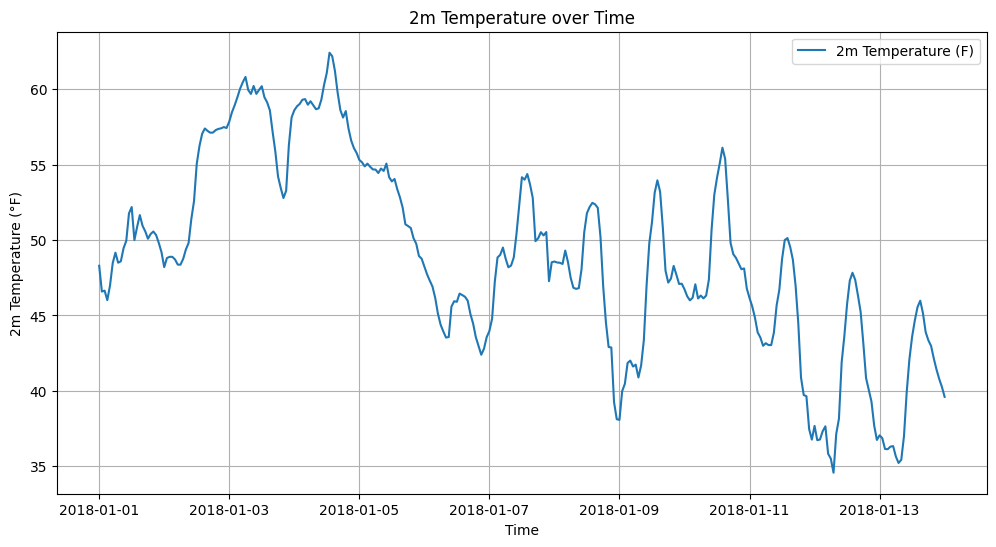

In [22]:
import matplotlib.pyplot as plt

# Plot the 2m_temperature value over time
# Convert temperature from Kelvin to Fahrenheit
t2m_df['2m_temperature_F'] = (t2m_df['2m_temperature'] - 273.15) * 9/5 + 32

plt.figure(figsize=(12, 6))
plt.plot(t2m_df['time'], t2m_df['2m_temperature_F'], label='2m Temperature (F)')
plt.xlabel('Time')
plt.ylabel('2m Temperature (°F)')
plt.title('2m Temperature over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the geographic bounding box
bbox = [5.9559,45.818,10.4921,47.8084] # Switzerland
lat_min, lat_max = bbox[1], bbox[3]
lon_min, lon_max = bbox[0], bbox[2]

time_filtered = ds['2m_temperature'].sel(time=slice(time_start, time_end))
print(time_filtered)

# Extract the 2m_temperature data within the bounding box and time range
# First, select the latitude and longitude ranges separately
t2m_bounding_box_lat = time_filtered.sel(latitude=slice(lat_min, lat_max))
t2m_bounding_box = t2m_bounding_box_lat.sel(longitude=slice(lon_min, lon_max))

# Then, use the method='nearest' argument for the final selection
t2m_bounding_box = t2m_bounding_box.sel(method='nearest')

# Convert to dataframe
t2m_bounding_box_df = t2m_bounding_box.to_dataframe().reset_index()
print(t2m_bounding_box_df.head())

Empty DataFrame
Columns: [time, latitude, longitude, 2m_temperature]
Index: []
